In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

In [ ]:
df = pd.read_csv('gaji_pengeluaran.csv')

In [ ]:
df.head()

,gaji,pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [ ]:
data = np.asarray(df)

Text(0.5, 1.0, 'Grafik Konsumen')

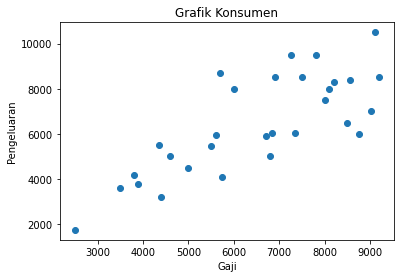

In [ ]:
plt.scatter(data[:,0],data[:,1], label ='True Position')
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.title("Grafik Konsumen")

In [ ]:
X = np.asarray(df)

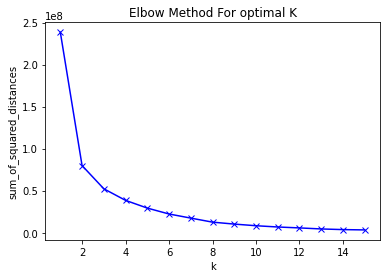

In [ ]:
sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For optimal K')
plt.show()

In [ ]:
model_kmeans_2 = KMeans(n_clusters=2)
model_kmeans_2.fit(X)
print(model_kmeans_2.cluster_centers_)

[[7748.33333333 7855.55555556]
 [4641.66666667 4337.5       ]]


In [ ]:
model_kmeans_3 = KMeans(n_clusters=3)
model_kmeans_3.fit(X)

KMeans(n_clusters=3)

In [ ]:
print(model_kmeans_3.cluster_centers_)

[[7793.84615385 8530.76923077]
 [4200.         3961.11111111]
 [7006.25       5862.5       ]]


In [ ]:
model_kmeans_4 = KMeans(n_clusters=4)
model_kmeans_4.fit(X)

KMeans(n_clusters=4)

In [ ]:
print(model_kmeans_4.cluster_centers_)

[[5133.33333333 5083.33333333]
 [7692.5        8658.33333333]
 [7708.57142857 6071.42857143]
 [3620.         3310.        ]]


# Evaluate Model

Paling Kecil nilai bouldin score maka makin optimal K nya

In [ ]:
print(davies_bouldin_score(X, model_kmeans_2.labels_))

0.6179572625129968


In [ ]:
print(davies_bouldin_score(X, model_kmeans_3.labels_))

0.7509190238483869


In [ ]:
print(davies_bouldin_score(X, model_kmeans_4.labels_))

0.7842343601470773


# Label

In [ ]:
df_clustered = pd.DataFrame(X)
df_clustered['cluster'] = pd.DataFrame(model_kmeans_2.labels_)
df_clustered = df_clustered.sort_values('cluster')
data_clustered = np.asarray(df_clustered)

In [ ]:
df_clustered

,0,1,cluster
14,8200,8300,0
18,9100,10500,0
17,8750,6000,0
16,8550,8400,0
15,8500,6500,0
28,8100,8000,0
13,7800,9500,0
12,7500,8500,0
11,7350,6050,0
19,9200,8500,0


Text(0.5, 1.0, 'cluster')

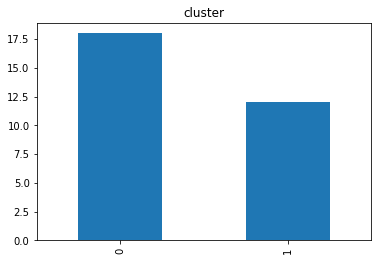

In [ ]:
df_clustered['cluster'].value_counts().plot(kind='bar')
plt.title('cluster')

In [ ]:
df

,gaji,pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200
5,5500,5450
6,5600,5950
7,5750,4100
8,6850,6050
9,6900,8500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


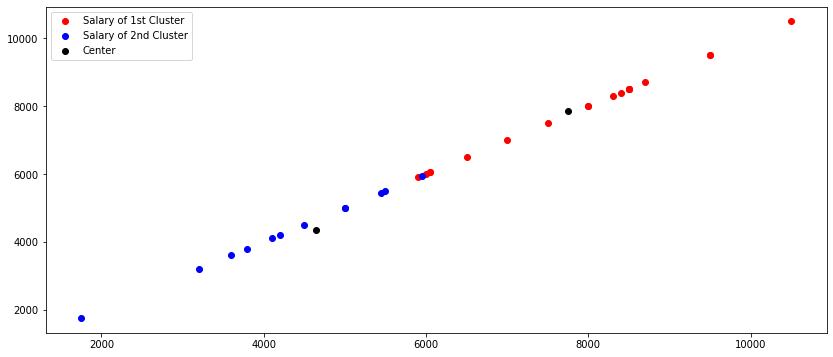

In [ ]:
plt.figure(figsize = (14, 6))

df1 = df[df_clustered.cluster==0]
df2 = df[df_clustered.cluster==1]
plt.scatter(df1.pengeluaran, df1['pengeluaran'], color = 'red', label = 'Salary of 1st Cluster')
plt.scatter(df2.pengeluaran, df2['pengeluaran'], color = 'blue', label = 'Salary of 2nd Cluster')
plt.scatter(model_kmeans_2.cluster_centers_[:, 0], model_kmeans_2.cluster_centers_[:, 1], color = 'black', label = 'Center')
plt.legend()